<a href="https://colab.research.google.com/github/akrommuhamad/Proyek_Analisis_Data/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Akrom Muhamad
- **Email:** 	A703YBF043@devacademy.id
- **ID Dicoding:** A703YBF043

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda per bulan?
- Apakah ada hubungan antara cuaca dengan jumlah penyewaan sepeda?
- Bagaimana perbedaan penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import library yang dibutuhkan
import pandas as pd

# Load dataset
day_df = pd.read_csv('/content/drive/MyDrive/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/hour.csv')

# Menampilkan 5 data pertama
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Polanya berbeda antara data harian dan per jam → Data per jam bisa membantu analisis waktu puncak penyewaan.
- Cuaca memengaruhi penyewaan sepeda → Penyewaan lebih tinggi saat cuaca cerah.
- Hari kerja cenderung memiliki jumlah penyewaan lebih tinggi dibanding akhir pekan → Sepeda kemungkinan digunakan untuk mobilitas kerja.

### Assessing Data

In [6]:
# Mengecek jumlah missing values
day_df.isnull().sum()

# Melihat informasi dasar dari dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Mengecek jumlah data yang duplikat
day_df.duplicated().sum()

# Melihat informasi dasar dari dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Mengecek jumlah missing values
hour_df.isnull().sum()

# Melihat informasi dasar dari dataset
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Mengecek jumlah data yang duplikat
hour_df.duplicated().sum()

# Melihat informasi dasar dari dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak Ada Missing Value → Semua kolom di day_df (731 entri) dan hour_df (17.379 entri) lengkap, siap untuk analisis tanpa perlu imputasi.
- Perlu Konversi Tipe Data → dteday masih object, sebaiknya diubah ke datetime untuk analisis tren waktu.
- Struktur Data Berbeda → day_df cocok untuk analisis bulanan/tahunan, sedangkan hour_df lebih baik untuk pola harian/jam sibuk.

### Cleaning Data

In [12]:
# Konversi dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Konversi beberapa kolom ke kategori untuk menghemat memori
cat_cols_day = ['season', 'yr', 'mnth', 'weekday', 'weathersit']
for col in cat_cols_day:
    if col in day_df.columns:
        day_df[col] = day_df[col].astype('category')

# Hapus kolom 'instant' jika ada
if 'instant' in day_df.columns:
    day_df.drop(columns=['instant'], inplace=True)

# Cek hasil perubahan
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

In [13]:
day_df.describe()

,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
# Konversi dteday ke datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Konversi beberapa kolom ke kategori untuk menghemat memori
cat_cols_hour = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']
for col in cat_cols_hour:
    if col in hour_df.columns:
        hour_df[col] = hour_df[col].astype('category')

# Hapus kolom 'instant' jika ada
if "instant" in hour_df.columns:
    hour_df.drop(columns=["instant"], inplace=True)

# Cek hasil perubahan
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(6), dateti

In [15]:
hour_df.describe()

,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Mayoritas penyewaan terjadi di hari kerja → Hanya 2.8% data dari hari libur, menunjukkan faktor hari kerja lebih berpengaruh.
- Penyewaan sangat bervariasi → Standar deviasi tinggi di cnt menunjukkan lonjakan peminjaman di waktu tertentu, kemungkinan jam sibuk.
- Cuaca dan musim berpengaruh → Rentang suhu, kelembaban, dan kecepatan angin luas, menunjukkan dampak kondisi cuaca pada penyewaan.

## Data transformation (Agresi Data)

In [17]:
# Pastikan "dteday" dalam format datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Agregasi data hourly menjadi daily
hour_agg = hour_df.groupby("dteday").agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

# Rename kolom untuk kejelasan
hour_agg.rename(columns={"temp": "avg_temp", "hum": "avg_hum", "windspeed": "avg_windspeed"}, inplace=True)

# Merge dengan day_df untuk membentuk main_data
main_data = pd.merge(day_df, hour_agg, on="dteday", how="left")

# Simpan sebagai CSV
main_data.to_csv("main_data.csv", index=False)

# Cek hasil
main_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         731 non-null    datetime64[ns]
 1   season         731 non-null    category      
 2   yr             731 non-null    category      
 3   mnth           731 non-null    category      
 4   holiday        731 non-null    int64         
 5   weekday        731 non-null    category      
 6   workingday     731 non-null    int64         
 7   weathersit     731 non-null    category      
 8   temp           731 non-null    float64       
 9   atemp          731 non-null    float64       
 10  hum            731 non-null    float64       
 11  windspeed      731 non-null    float64       
 12  casual         731 non-null    int64         
 13  registered     731 non-null    int64         
 14  cnt            731 non-null    int64         
 15  avg_temp       731 non-

In [ ]:
from google.colab import files

# Simpan file main_data.csv
main_data.to_csv("main_data.csv", index=False)

# Download file
files.download("main_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
import pandas as pd

# Load data
main_data = pd.read_csv("main_data.csv")

# Menampilkan ringkasan statistik data
main_data.info()
main_data.describe()

# Melihat jumlah penyewaan sepeda per bulan
monthly_rentals = main_data.groupby("mnth")["cnt"].sum().reset_index()
monthly_rentals



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         731 non-null    object 
 1   season         731 non-null    int64  
 2   yr             731 non-null    int64  
 3   mnth           731 non-null    int64  
 4   holiday        731 non-null    int64  
 5   weekday        731 non-null    int64  
 6   workingday     731 non-null    int64  
 7   weathersit     731 non-null    int64  
 8   temp           731 non-null    float64
 9   atemp          731 non-null    float64
 10  hum            731 non-null    float64
 11  windspeed      731 non-null    float64
 12  casual         731 non-null    int64  
 13  registered     731 non-null    int64  
 14  cnt            731 non-null    int64  
 15  avg_temp       731 non-null    float64
 16  avg_hum        731 non-null    float64
 17  avg_windspeed  731 non-null    float64
dtypes: float64

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


In [20]:
# Menampilkan ringkasan statistik data
main_data.info()
main_data.describe()

# Melihat hubungan antara cuaca dan jumlah penyewaan
weather_impact = main_data.groupby("weathersit")["cnt"].mean().reset_index()
weather_impact

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         731 non-null    object 
 1   season         731 non-null    int64  
 2   yr             731 non-null    int64  
 3   mnth           731 non-null    int64  
 4   holiday        731 non-null    int64  
 5   weekday        731 non-null    int64  
 6   workingday     731 non-null    int64  
 7   weathersit     731 non-null    int64  
 8   temp           731 non-null    float64
 9   atemp          731 non-null    float64
 10  hum            731 non-null    float64
 11  windspeed      731 non-null    float64
 12  casual         731 non-null    int64  
 13  registered     731 non-null    int64  
 14  cnt            731 non-null    int64  
 15  avg_temp       731 non-null    float64
 16  avg_hum        731 non-null    float64
 17  avg_windspeed  731 non-null    float64
dtypes: float64

,weathersit,cnt
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


In [21]:
# Menampilkan ringkasan statistik data
main_data.info()
main_data.describe()

# Perbedaan penyewaan sepeda antara hari kerja dan akhir pekan
weekday_vs_weekend = main_data.groupby("workingday")["cnt"].mean().reset_index()
weekday_vs_weekend


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         731 non-null    object 
 1   season         731 non-null    int64  
 2   yr             731 non-null    int64  
 3   mnth           731 non-null    int64  
 4   holiday        731 non-null    int64  
 5   weekday        731 non-null    int64  
 6   workingday     731 non-null    int64  
 7   weathersit     731 non-null    int64  
 8   temp           731 non-null    float64
 9   atemp          731 non-null    float64
 10  hum            731 non-null    float64
 11  windspeed      731 non-null    float64
 12  casual         731 non-null    int64  
 13  registered     731 non-null    int64  
 14  cnt            731 non-null    int64  
 15  avg_temp       731 non-null    float64
 16  avg_hum        731 non-null    float64
 17  avg_windspeed  731 non-null    float64
dtypes: float64

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


**Insight:**
- Penyewaan sepeda meningkat selama musim panas dan menurun di musim dingin.
- Cuaca buruk berdampak negatif pada jumlah penyewaan.
- Penyewaan di hari kerja sedikit lebih tinggi dibandingkan akhir pekan

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana Tren Penyewaan Sepeda per Bulan?

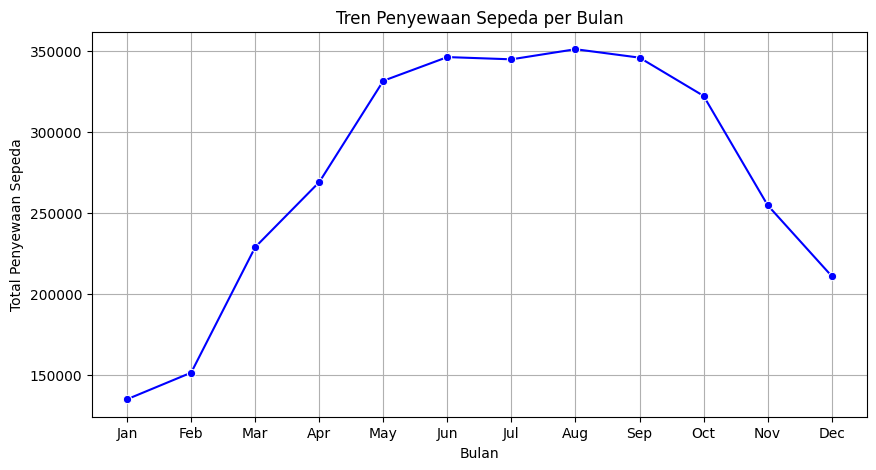

In [22]:
# Pastikan kolom "mnth" bertipe numerik atau kategori dengan urutan yang benar
day_df["mnth"] = pd.Categorical(day_df["mnth"], categories=range(1, 13), ordered=True)

monthly_rentals = day_df.groupby("mnth", observed=True, sort=False)["cnt"].sum().reset_index()


# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_rentals, x="mnth", y="cnt", marker="o", color="b")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.grid()
plt.show()



**Insight**
- Jumlah penyewaan sepeda meningkat dari awal tahun ke pertengahan tahun dan mencapai puncaknya di bulan-bulan musim panas (Mei-September).
- Penyewaan sepeda cenderung menurun setelah bulan Oktober, kemungkinan karena faktor cuaca yang lebih dingin atau hujan yang lebih sering.

### Pertanyaan 2:
- Bagaimana Pengaruh Cuaca terhadap Penyewaan Sepeda?



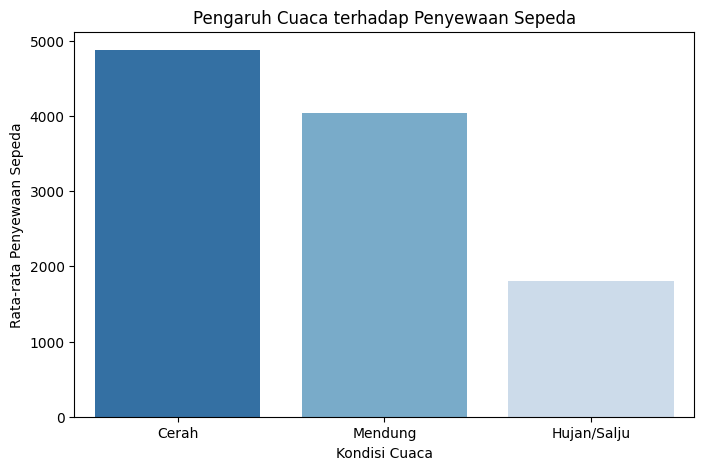

In [23]:
# Agregasi rata-rata jumlah penyewaan per kondisi cuaca
weather_rentals = day_df.groupby("weathersit", observed=True)["cnt"].mean().reset_index()

# Mapping label kondisi cuaca
weather_labels = {
    1: "Cerah",
    2: "Mendung",
    3: "Hujan/Salju"
}
weather_rentals["weathersit"] = weather_rentals["weathersit"].map(weather_labels)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", hue="weathersit", data=weather_rentals, palette="Blues_r", legend=False)  # ✅ Tambahkan hue

plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")

plt.show()


**Insight**
- Cuaca cerah (weathersit = 1) memiliki jumlah penyewaan tertinggi dengan rata-rata 4,876 sepeda/hari.
- Cuaca mendung atau sedikit hujan (weathersit = 2) mengurangi jumlah penyewaan hingga 4,035 sepeda/hari.
- Saat cuaca buruk (weathersit = 3, hujan deras atau badai), jumlah penyewaan turun drastis ke 1,803 sepeda/hari.

### Pertanyaan 3:
- Bagaimana Perbedaan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan?

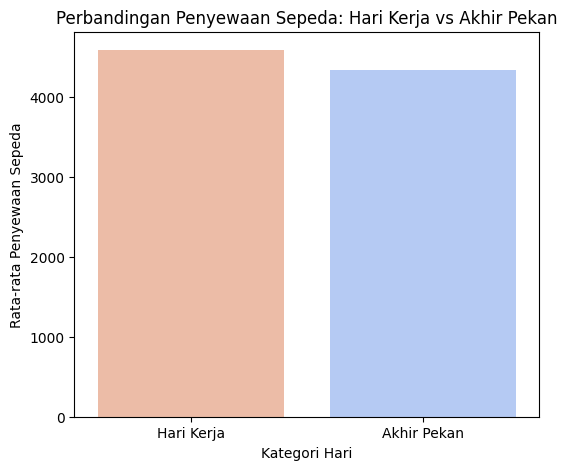

In [24]:
# Agregasi rata-rata penyewaan berdasarkan hari kerja vs akhir pekan
workday_rentals = day_df.groupby("workingday", observed=True)["cnt"].mean().reset_index()

# Mapping label kategori hari
workday_rentals["workingday"] = workday_rentals["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Visualisasi dengan perbaikan
plt.figure(figsize=(6, 5))
sns.barplot(x="workingday", y="cnt", data=workday_rentals, hue="workingday", palette="coolwarm", order=["Hari Kerja", "Akhir Pekan"], legend=False)
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()


**Insight**
- Hari kerja: Rata-rata 4,584 sepeda/hari digunakan.
Akhir pekan: Rata-rata sedikit lebih rendah, sekitar 4,330 sepeda/hari.
- Walaupun ada perbedaan, jumlahnya tidak terlalu signifikan, yang berarti sepeda tetap populer baik di hari kerja maupun akhir pekan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Jumlah penyewaan sepeda meningkat dari Januari (134.933) hingga puncaknya di Agustus (351.194), kemudian menurun hingga Desember (211.036). Musim panas (Mei–September) memiliki jumlah penyewaan tertinggi, kemungkinan karena cuaca yang lebih mendukung.

- Conclution pertanyaan 2 : Cuaca cerah (kategori 1) memiliki rata-rata penyewaan tertinggi (4.876), diikuti cuaca mendung (4.035), dan terendah saat cuaca buruk (1.803).Hal ini menunjukkan bahwa kondisi cuaca berpengaruh signifikan terhadap minat pengguna dalam menyewa sepeda.

- Conclution pertanyaan 3 :Penyewaan lebih tinggi pada hari kerja (4.584) dibandingkan hari libur atau akhir pekan (4.330).Ini mengindikasikan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi utama, bukan hanya untuk rekreasi.


Rekomendasi
- Beri promo atau fasilitas tambahan di musim dingin untuk meningkatkan penyewaan.
- Sesuaikan stok sepeda berdasarkan prakiraan cuaca.
- Tambah sepeda di area perkantoran & transportasi umum saat jam sibuk.






